In [1]:
# import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

start="2004-01-01"
end="2024-04-17"

st.title('Stock Closing Price Prediction')
# reading data
user_input = st.text_input('Enter Stock Ticker', '^JKSE')
df = pdr.get_data_yahoo(user_input, start, end)
df

2024-05-18 12:00:08.994 
  command:

    streamlit run c:\Users\derik\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-05-18 12:00:08.994 Session state does not function when running a script without `streamlit run`


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,691.375977,704.497986,687.997986,704.497986,704.497986,11244500
2004-01-05,706.369995,725.471985,706.369995,725.471985,725.471985,35915500
2004-01-06,728.719971,738.158997,717.828979,723.989014,723.989014,39797000
2004-01-07,723.906006,723.924011,705.841003,709.367004,709.367004,33583800
2004-01-08,709.362976,730.815002,709.362976,730.815002,730.815002,31361400
...,...,...,...,...,...,...
2024-04-02,7199.124023,7236.983887,7153.938965,7236.983887,7236.983887,127711500
2024-04-03,7214.020020,7226.353027,7158.740234,7166.844238,7166.844238,111040300
2024-04-04,7170.719238,7254.398926,7165.831055,7254.398926,7254.398926,108900300




1/1 [==============================] - 0s 28ms/step


DeltaGenerator()

<Figure size 1200x600 with 0 Axes>

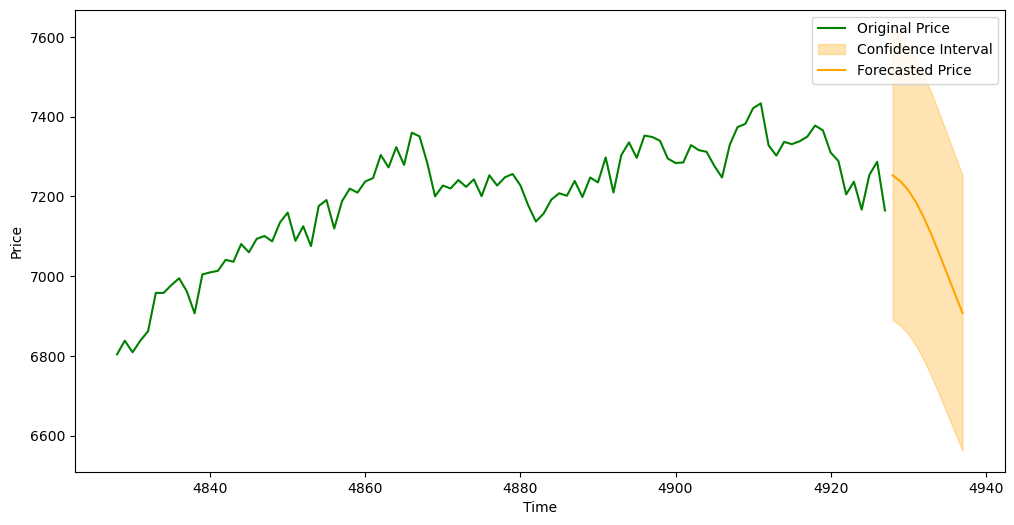

In [12]:
# import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

start="2004-01-01"
end="2024-04-17"

st.title('Stock Closing Price Prediction')
# reading data
user_input = st.text_input('Enter Stock Ticker', '^JKSE')
df = pdr.get_data_yahoo(user_input, start, end)
df

# Predict with model
from keras.models import load_model 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import data as pdr

model = load_model('keras_model.h5')
def multistep_forecast_with_confidence(model, scaler, input_seq, n_steps, confidence_pct=0.05):
    # Reshape input to match the model's expected input shape
    forecast = input_seq[-100:].reshape(1, 100, 1)
    predictions = []
    lower_bounds = []
    upper_bounds = []

    for _ in range(n_steps):
        pred = model.predict(forecast)[0, 0]
        # Inverse transform the scaled prediction
        pred_rescaled = scaler.inverse_transform([[pred*1.05]])[0, 0]
        predictions.append(pred_rescaled)
        
        # Calculate confidence interval bounds
        lower_bound = pred_rescaled * (1 - confidence_pct)
        upper_bound = pred_rescaled * (1 + confidence_pct)
        lower_bounds.append(lower_bound)
        upper_bounds.append(upper_bound)
        
        # Update the forecast with the new prediction
        new_forecast = np.append(forecast[0, 1:, 0], pred).reshape(1, 100, 1)
        forecast = new_forecast

    return predictions, lower_bounds, upper_bounds

# Fetch new data and preprocess it
final_df = pd.DataFrame(df['Close']) 
final_df = final_df.reset_index()
final_df = pd.DataFrame(final_df['Close'])

# Scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
input_data = scaler.fit_transform(final_df)

# Prepare the last known data points
last_known_points = input_data[-100:]

# Forecasting the next 10 days with confidence intervals
predictions_10_days, lower_bounds, upper_bounds = multistep_forecast_with_confidence(model, scaler, last_known_points, 10)

# final plot
st.subheader('Predicted Vs Original')
fig3 = plt.figure(figsize = (12, 6))

# plot 10 days forecast with the confidence interval
fig3 = plt.figure(figsize=(12, 6))
plt.plot(final_df[-100:], 'g', label="Original Price")
plt.fill_between(range(len(final_df), len(final_df) + len(predictions_10_days)), lower_bounds, upper_bounds, color='orange', alpha=0.3, label="Confidence Interval")
plt.plot(range(len(final_df), len(final_df) + len(predictions_10_days)), predictions_10_days, 'orange', label="Forecasted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
st.pyplot(fig3)

In [ ]:
st.subheader('Dated from 1st Jan, 2004 to 30th Apr, 2024')
st.write(df.describe())

# first plot
st.subheader('Closing Price Vs Time Chart')
fig1 = plt.figure(figsize = (12, 6))
plt.plot(df.Close)
st.pyplot(fig1)

# moving average
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

# second plot
st.subheader('Closing Price Vs Time Chart with 100 days Moving Average')
fig2 = plt.figure(figsize = (12, 6))
plt.plot(df.Close, 'r', label="Per Day Closing")
plt.plot(ma100, 'g', label="Moving Average 100")
st.pyplot(fig2)

# third plot
st.subheader('Closing Price Vs Time Chart with 100 days and 200 days Moving Average')
fig2 = plt.figure(figsize = (12, 6))
plt.plot(ma200, 'b', label="Moving Average 200")
plt.plot(ma100, 'g', label="Moving Average 100")
st.pyplot(fig2)
